# Neal's Funnel Target Practice

In [1]:
] activate "../"

  Activating project at `~/PhD/MicroCanonicalHMC.jl`


In [2]:
# The statistical inference frame-work we will use
using Turing
using Interpolations
using ForwardDiff
using LinearAlgebra
using Random
#using StatsPlots
using PyPlot
using Distributed

using Revise
using MicroCanonicalHMC

In [3]:
d = 21
@model function funnel()
    θ ~ Normal(0, 3)
    z ~ MvNormal(zeros(20), ones(20))
    zz = z .* exp(θ)
    x ~ MvNormal(zz, I)
end

funnel (generic function with 2 methods)

In [4]:
Random.seed!(1)
(;x) = rand(funnel() | (θ=0,))
funnel_model = funnel() | (;x)

DynamicPPL.Model{typeof(funnel), (), (), (), Tuple{}, Tuple{}, DynamicPPL.ConditionContext{NamedTuple{(:x,), Tuple{Vector{Float64}}}, DynamicPPL.DefaultContext}}(funnel, NamedTuple(), NamedTuple(), ConditionContext((x = [0.7273459156073062, -0.7137895625029701, -1.3112158987551843, 3.195064335503728, 0.6578668590997088, 1.8201670957594605, 2.5774094189910475, 1.2959606640141557, -2.615684720848553, -1.7192495259048919, 0.38510954102334116, 0.7049475219687015, 1.4527158089056038, 1.5438517444010695, 0.8504145036053463, 0.9997932200168839, -0.14767140951984356, 0.6046583528834097, -0.38477500804604936, -1.506202996455002],), DynamicPPL.DefaultContext()))

## MCHMC

In [5]:
funnel_target = NealFunnelTarget(funnel_model; d=d, compute_MAP=false)
funnel_target.d = d
funnel_spl = MCHMC(0.0, 0.5; varE_wanted=0.3, sigma=ones(d));

In [6]:
funnel_samples_mchmc = Sample(funnel_spl, funnel_target, 100000;
                        dialog=true)

[ Info: Tuning eps ⏳


eps: 0.5 --> VarE: 0.0006734849591280059
eps: 0.6744750020196311 --> VarE: 0.002464860259974141
eps: 0.8951209002291195 --> VarE: 6.146570477636784
eps: 0.004512101718144146 --> VarE: 7.788491311260353e-11
eps: 0.005841428953433579 --> VarE: 1.2647675702324863e-10
eps: 0.007467756926959165 --> VarE: 1.6816310007642528e-10
eps: 0.009433195563772544 --> VarE: 3.865854123870277e-10
eps: 0.011780909439583098 --> VarE: 1.0107959859683773e-9
eps: 0.014554304669695789 --> VarE: 1.3483640510599738e-9
eps: 0.017796162005054853 --> VarE: 5.665443117851885e-9
eps: 0.02154774688599662 --> VarE: 9.451354298660305e-9
eps: 0.025847928191481392 --> VarE: 1.6469051327262047e-7
eps: 0.030732333182833027 --> VarE: 9.9285695263602e-7
eps: 0.036232562984067684 --> VarE: 2.134635440099296e-6
eps: 0.04237552110527545 --> VarE: 2.6388210730587563e-6
eps: 0.04918285778746374 --> VarE: 3.0692679065239524e-6
eps: 0.05667049244480701 --> VarE: 3.5199079577646543e-6
eps: 0.06484830462988321 --> VarE: 4.01860346604

[ Info: Found eps: 0.7724759951400401 ✅


100001-element Vector{Any}:
 [-6.6290275145641075, 0.8881549192171322, 0.8105160173302769, -0.27702671000900747, 0.730560123154163, -1.9910112561349194, 1.6660702920307395, 0.753052363925761, 0.1736699411479059, 0.37297068504370867  …  1.7398087749367097, -0.1573624333758449, 0.5771329085720802, 0.46569043425656353, 0.3393946667168134, -0.004306679121045099, -1.2814432445817399, -0.556537932280965, 0.0, -72.03111990891568]
 [-6.504058267079287, 1.0138420945935587, 0.7392925340938004, -0.2955432557245055, 0.8181050537939314, -1.9115896591286523, 1.652250574537225, 0.7236456043158656, 0.08492187696771443, 0.631277179510395  …  1.850049168316891, -0.2130527993971397, 0.5371369677457133, 0.18937832048560244, -0.0814907008221798, 0.37732207740865326, -1.225594450259146, -0.6574704800238624, 0.008136488059008684, -71.87355025217325]
 [-6.8707602755893635, 1.0164805154713972, 0.5187745213973854, -0.2869904744038791, 0.8135801502992153, -1.8727539500554633, 1.3400506017853915, 0.63878615110160

In [7]:
theta_mchmc = [sample[1] for sample in funnel_samples_mchmc]
x10 = [sample[10+1] for sample in funnel_samples_mchmc];

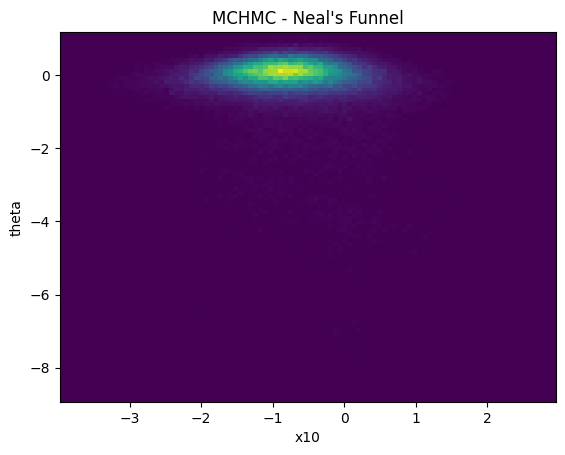

In [8]:
plt.hist2d(x10, theta_mchmc, bins=100);
plt.ylabel("theta")
plt.xlabel("x10")
plt.title("MCHMC - Neal's Funnel");

## NUTS

In [9]:
funnel_samples_hmc = sample(funnel_model, NUTS(10, 0.65), 10000, progress=true; save_state=true)

┌ Info: Found initial step size
└   ϵ = 0.05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02


Chains MCMC chain (10000×33×1 Array{Float64, 3}):

Iterations        = 11:1:10010
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 8.02 seconds
Compute duration  = 8.02 seconds
parameters        = θ, z[1], z[2], z[3], z[4], z[5], z[6], z[7], z[8], z[9], z[10], z[11], z[12], z[13], z[14], z[15], z[16], z[17], z[18], z[19], z[20]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           θ   -0.1103    0.7600     0.0076    0.0223   1177.9613    1.0015    ⋯
        z[1]    0.3361    0.7123     0.0071    0.0079   8552.9736    1.0000    ⋯
        z[2]   -0.3352    0.7356     0.0074    0.0070   9124.0618    0.9999    ⋯
        z[3]   -0.600

In [10]:
axes(funnel_samples_hmc.value.data)[1]

Base.OneTo(10000)

In [11]:
theta = [funnel_samples_hmc.value.data[i, 1, :][1] for i in axes(funnel_samples_hmc.value.data)[1]]
x10 = [funnel_samples_hmc.value.data[i, 10+1, :][1] for i in axes(funnel_samples_hmc.value.data)[1]];

10000-element Vector{Float64}:
 -0.6832891911160637
 -0.8653082993746111
 -0.5645056677338569
 -1.1718858530377247
 -0.8717806693005784
 -0.2372236811098349
 -1.002596237800879
 -0.8359025635712256
 -0.5667629129638847
 -0.9708693477954825
 -0.235849779826719
 -1.2225097713922082
 -1.369187272954133
  ⋮
 -1.7527342644257848
 -0.6222695679433239
 -0.4417216035077439
 -1.541211951184557
  1.563096554471496
 -2.069449884748807
 -0.05853858707761256
  0.018297816471497766
 -2.4634315980591888
  0.8887365823999389
  0.3606749215182734
 -0.6377872742109763

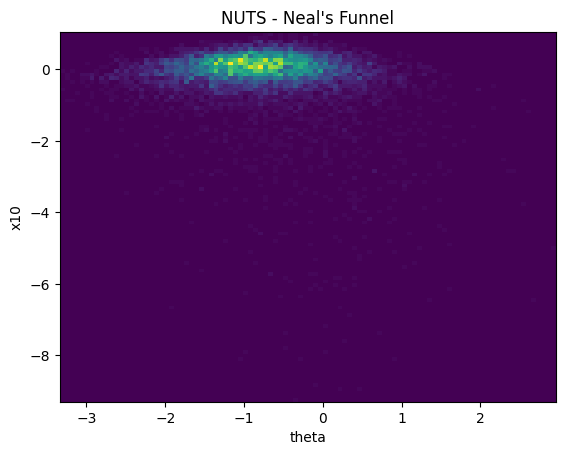

In [12]:
plt.hist2d(x10, theta, bins=100);
plt.xlabel("theta")
plt.ylabel("x10")
plt.title("NUTS - Neal's Funnel");